<a href="https://colab.research.google.com/github/isamubas/isamubas/blob/main/Impact_of_market_changes_on_the_different_regions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libralies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
# connect google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# connect dataset
df = pd.read_csv('/content/drive/MyDrive/psd_alldata.csv')
df.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,20,Beginning Stocks,21,(MT),0.0
1,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,125,Domestic Consumption,21,(MT),0.0
2,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,176,Ending Stocks,21,(MT),0.0
3,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,88,Exports,21,(MT),0.0
4,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,57,Imports,21,(MT),0.0


In [ ]:
#select 1500 rows starting from a specific index
sampled_data=df.iloc[1:1500]
print(sampled_data.head())

   Commodity_Code   Commodity_Description Country_Code Country_Name  \
1          577400  Almonds, Shelled Basis           AF  Afghanistan   
2          577400  Almonds, Shelled Basis           AF  Afghanistan   
3          577400  Almonds, Shelled Basis           AF  Afghanistan   
4          577400  Almonds, Shelled Basis           AF  Afghanistan   
5          577400  Almonds, Shelled Basis           AF  Afghanistan   

   Market_Year  Calendar_Year  Month  Attribute_ID Attribute_Description  \
1         2010           2018     10           125  Domestic Consumption   
2         2010           2018     10           176         Ending Stocks   
3         2010           2018     10            88               Exports   
4         2010           2018     10            57               Imports   
5         2010           2018     10            28            Production   

   Unit_ID Unit_Description  Value  
1       21             (MT)    0.0  
2       21             (MT)    0.0  
3    

In [ ]:
sampled_data.shape

(1499, 12)

In [ ]:
df.shape

(1893873, 12)

In [ ]:
#cleaning the dataset in case its not clean is our next step
#checking for missing values
print(df.isnull().sum())

Commodity_Code              0
Commodity_Description       0
Country_Code             1004
Country_Name                0
Market_Year                 0
Calendar_Year               0
Month                       0
Attribute_ID                0
Attribute_Description       0
Unit_ID                     0
Unit_Description            0
Value                       0
dtype: int64


In [ ]:
#Drop rows with missing values
df=df.dropna()

In [ ]:
# checking for missing values again
print(df.isnull().sum())

Commodity_Code           0
Commodity_Description    0
Country_Code             0
Country_Name             0
Market_Year              0
Calendar_Year            0
Month                    0
Attribute_ID             0
Attribute_Description    0
Unit_ID                  0
Unit_Description         0
Value                    0
dtype: int64


In [ ]:
# checking  for information within the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1892869 entries, 0 to 1893872
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Commodity_Code         int64  
 1   Commodity_Description  object 
 2   Country_Code           object 
 3   Country_Name           object 
 4   Market_Year            int64  
 5   Calendar_Year          int64  
 6   Month                  int64  
 7   Attribute_ID           int64  
 8   Attribute_Description  object 
 9   Unit_ID                int64  
 10  Unit_Description       object 
 11  Value                  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 187.7+ MB


In [ ]:
#to check our sampled_data
sampled_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 1 to 1499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity_Code         1499 non-null   int64  
 1   Commodity_Description  1499 non-null   object 
 2   Country_Code           1499 non-null   object 
 3   Country_Name           1499 non-null   object 
 4   Market_Year            1499 non-null   int64  
 5   Calendar_Year          1499 non-null   int64  
 6   Month                  1499 non-null   int64  
 7   Attribute_ID           1499 non-null   int64  
 8   Attribute_Description  1499 non-null   object 
 9   Unit_ID                1499 non-null   int64  
 10  Unit_Description       1499 non-null   object 
 11  Value                  1499 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 140.7+ KB


In [ ]:
#next is to normalize and encode  categorical variables
df['Commodity_Description']=df['Commodity_Description'].astype('category').cat.codes
df['Country_Code']=df['Country_Code'].astype('category').cat.codes
df['Country_Name']=df['Country_Name'].astype('category').cat.codes
df['Attribute_Description']=df['Attribute_Description'].astype('category').cat.codes
df['Unit_Description']=df['Unit_Description'].astype('category').cat.codes
print(df.head())



   Commodity_Code  Commodity_Description  Country_Code  Country_Name  \
0          577400                      0             1             0   
1          577400                      0             1             0   
2          577400                      0             1             0   
3          577400                      0             1             0   
4          577400                      0             1             0   

   Market_Year  Calendar_Year  Month  Attribute_ID  Attribute_Description  \
0         2010           2018     10            20                      8   
1         2010           2018     10           125                     19   
2         2010           2018     10           176                     20   
3         2010           2018     10            88                     21   
4         2010           2018     10            57                     33   

   Unit_ID  Unit_Description  Value  
0       21                 6    0.0  
1       21                 6

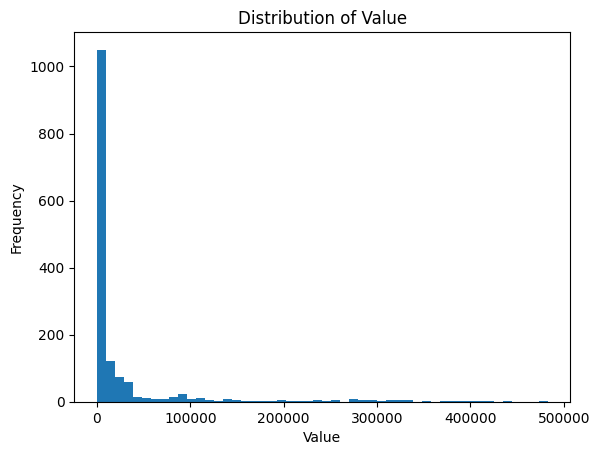

In [ ]:
#univariate visualization: histogram
plt.hist(sampled_data['Value'], bins=50)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

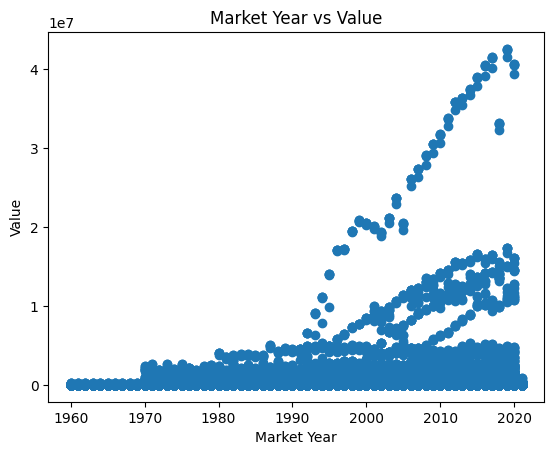

In [ ]:
#Multivariate visualization: Scatter plot
plt.scatter(df['Market_Year'], df['Value'])
plt.title('Market Year vs Value')
plt.xlabel('Market Year')
plt.ylabel('Value')
plt.show()

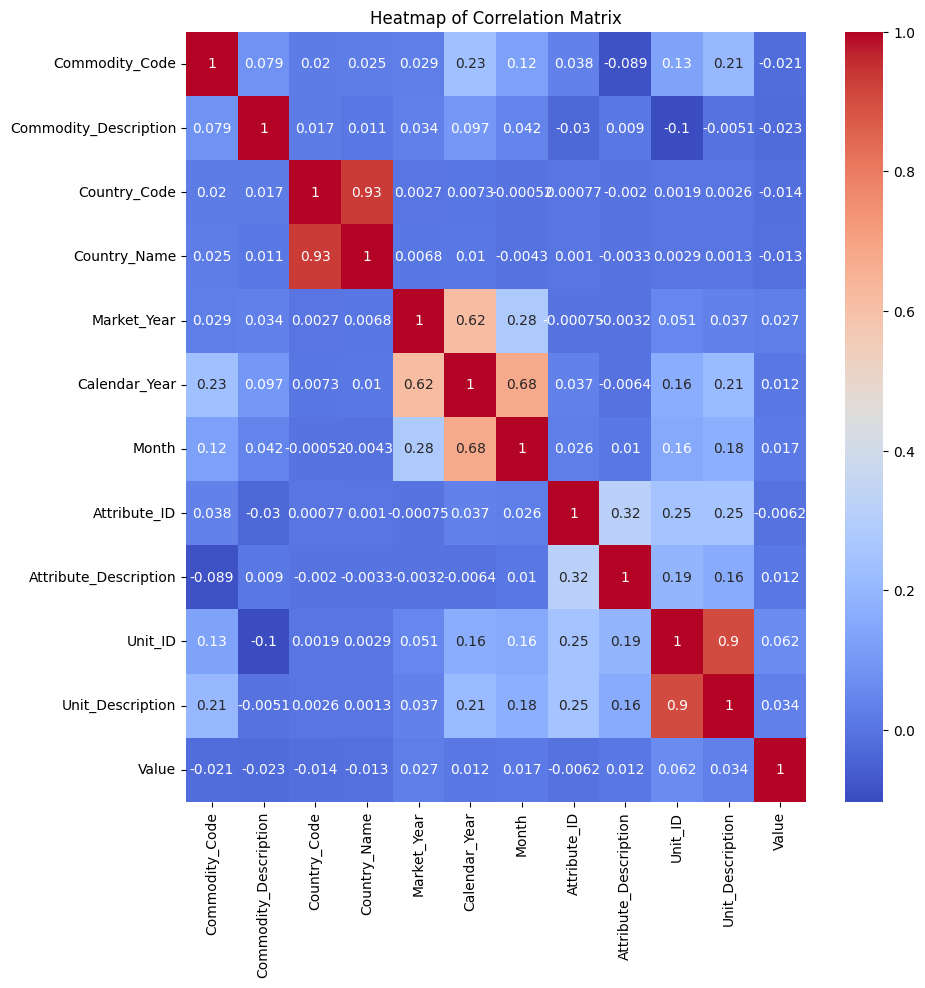

In [ ]:
#Multivariate Visualization: heatmap
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
#create a subset for a specific region and time period
#lets first have a list of our countries of interest
countries_of_interest=[0,2,5,7,24,33]
#so considering multiple countries of Africa and a specific period
Subset=df[(df['Country_Name'].isin(countries_of_interest)) & (df['Market_Year'].isin([1970,1999,2020]))]
#Display the subset
print(Subset.head())

     Commodity_Code  Commodity_Description  Country_Code  Country_Name  \
160          577400                      0             2             2   
161          577400                      0             2             2   
162          577400                      0             2             2   
163          577400                      0             2             2   
164          577400                      0             2             2   

     Market_Year  Calendar_Year  Month  Attribute_ID  Attribute_Description  \
160         2020           2020     10            20                      8   
161         2020           2020     10           125                     19   
162         2020           2020     10           176                     20   
163         2020           2020     10            88                     21   
164         2020           2020     10            57                     33   

     Unit_ID  Unit_Description   Value  
160       21                 6     0.0 

In [ ]:
print(Subset.shape)

(6873, 12)


In [ ]:
#we may have to debug
print(df['Country_Name'].unique())
print(df['Market_Year'].unique())

[  0   2   5   7  24  33  36  37  38  61  81  91  94  95  96  99 100 102
 103 104 107 121 128 132 138 143 146 153 158 162 173 175 182 184 187 191
 192 197 199 204   6   8   9  14  16  17  26  42  47  48  50  53  54  55
  58  51  64  65  66  68  74  75  76  77  85  89  90  92  98 109 111 116
 129 136 139 147 150 151 152 157 169 181 185 193 195 196 198 200 201 203
 209 168   1   3  12  22  28  44  97 106 108 112 115 135 141 144 155 164
 176 183 210 211  20  21  45  46  57  60  93 105 124 142 165 170 206 208
  18  29  32  34  40  41  43  56  71  78  86  88 101 110 114 119 120 137
 148 149 159 167 186 188 190 194  23  27  30  31  35  59  72  87 113 123
 126 133 134 163 172 174  11 127 140 179 207 117  73  63 160  19  62  13
 180   4  10 118 131  49 145  39 161 171 202  15  25 156  52  67  69  70
  79  80  82  83  84 122 125 130 154 166 177 178 189 205]
[2010 2001 2002 2003 2004 2005 2006 2007 2008 2009 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 1983 1984 1985 1986 1987 1988 1989 19

In [ ]:
#filter by countries to see if encoding changed the data
subset_countries=df[df['Country_Name'].isin(df['Country_Name'].unique())]
print(subset_countries.head())

   Commodity_Code  Commodity_Description  Country_Code  Country_Name  \
0          577400                      0             1             0   
1          577400                      0             1             0   
2          577400                      0             1             0   
3          577400                      0             1             0   
4          577400                      0             1             0   

   Market_Year  Calendar_Year  Month  Attribute_ID  Attribute_Description  \
0         2010           2018     10            20                      8   
1         2010           2018     10           125                     19   
2         2010           2018     10           176                     20   
3         2010           2018     10            88                     21   
4         2010           2018     10            57                     33   

   Unit_ID  Unit_Description  Value  
0       21                 6    0.0  
1       21                 6

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
X = Subset[['Market_Year', 'Commodity_Code', 'Attribute_Description', 'Unit_Description']]
y = Subset['Value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4503311118.187568


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Prediction and Evaluation
y_pred_nn = model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Neural Network Mean Squared Error: {mse_nn}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6892895232.0000 - val_loss: 8350792192.0000
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7991079424.0000 - val_loss: 8267907072.0000
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8184626688.0000 - val_loss: 8208938496.0000
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5369722880.0000 - val_loss: 8187912704.0000
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7437082624.0000 - val_loss: 8202085376.0000
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8654651392.0000 - val_loss: 8522356736.0000
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4807311872.0000 - val_loss: 8197835776.0000
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6734466560.0000 - val_loss: 8187987456.0000
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5600837632.0000 - val_loss: 8242808320.0000
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7997261312.000

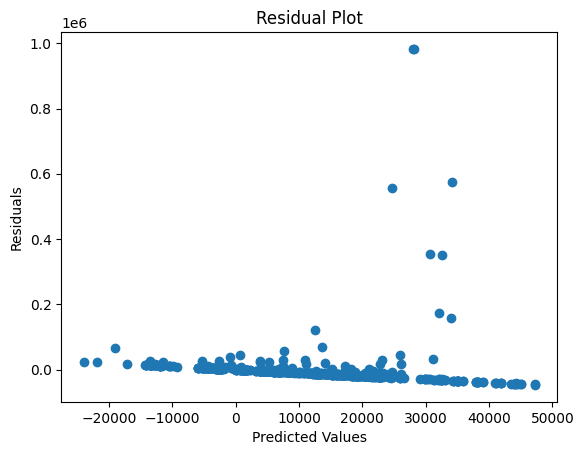

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


#To make our model better, we are going to do feature Engineering,data preprocess, model tuning, use ensemble method by using random Forest and Gradient boosting, carry out cross validation and then address overfitting and continue experimenting with Neural Networks, each step will ensure my model becomes more accurate and robust


In [ ]:
# Create interaction features
sampled_data['Market_Year_Commodity'] = sampled_data['Market_Year'] * sampled_data['Commodity_Code']

# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sampled_data[['Market_Year', 'Commodity_Code', 'Market_Year_Commodity']] = scaler.fit_transform(
    sampled_data[['Market_Year', 'Commodity_Code', 'Market_Year_Commodity']]
)

# Check new features
print(sampled_data.head())


   Commodity_Code   Commodity_Description Country_Code Country_Name  \
1             0.0  Almonds, Shelled Basis           AF  Afghanistan   
2             0.0  Almonds, Shelled Basis           AF  Afghanistan   
3             0.0  Almonds, Shelled Basis           AF  Afghanistan   
4             0.0  Almonds, Shelled Basis           AF  Afghanistan   
5             0.0  Almonds, Shelled Basis           AF  Afghanistan   

   Market_Year  Calendar_Year  Month  Attribute_ID Attribute_Description  \
1     0.049698           2018     10           125  Domestic Consumption   
2     0.049698           2018     10           176         Ending Stocks   
3     0.049698           2018     10            88               Exports   
4     0.049698           2018     10            57               Imports   
5     0.049698           2018     10            28            Production   

   Unit_ID Unit_Description  Value  Market_Year_Commodity  
1       21             (MT)    0.0                    0.